# Run the GP optimizer in two dimensions

In [1]:
%run -i ../../../examples/prepare_gp_optimizer.py

dofs = [kbv.x_rot, kbv.offz] # two degrees of freedom of the vertical KB mirror

hard_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50]])

for dof in dofs:
    dof.kind = "hinted"

In [2]:
gpo = Optimizer(
    init_scheme='quasi-random', 
    n_init=4, 
    run_engine=RE, 
    db=db, 
    detector=w9, 
    detector_type='image',
    dofs=dofs, 
    dof_bounds=hard_bounds, 
    fitness_model='max_sep_density',
    training_iter=100, 
    verbose=True,
)

learning with strategy "quasi-random" ...


   kbv_x_rot  kbv_offz    fitness
0  -0.049394  0.082829  11.238237
1   0.050606  0.193940  11.004138
2  -0.099394 -0.472727        NaN
3   0.000606 -0.139393  12.600029


We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. But now that we have some points to work with, we can start to call some more sophisticated learning strategies. Let's try exploring the space ("explore"), and then try to aim for the best possible fitness ("exploit").

In [3]:
gpo.learn(n_iter=2, n_per_iter=2, strategy='explore', greedy=True, reuse_hypers=False)
gpo.learn(n_iter=2, n_per_iter=2, strategy='exploit', greedy=True, reuse_hypers=False)

learning with strategy "explore" ...


   kbv_x_rot  kbv_offz    fitness
4  -0.029628  0.352498  12.198085
5   0.070372  0.019165   9.615414


   kbv_x_rot  kbv_offz    fitness
6  -0.045686  0.275371  11.511469
7   0.054314 -0.391295  11.897532
learning with strategy "exploit" ...


   kbv_x_rot  kbv_offz    fitness
8  -0.091589  0.425948  11.509061
9   0.008411  0.092615  12.233675


    kbv_x_rot  kbv_offz    fitness
10  -0.010295  0.289144  12.573241
11   0.089705 -0.044189   9.350057


We can plot the "state" of the GPs, which shows their posteriors about the whole parameter space:

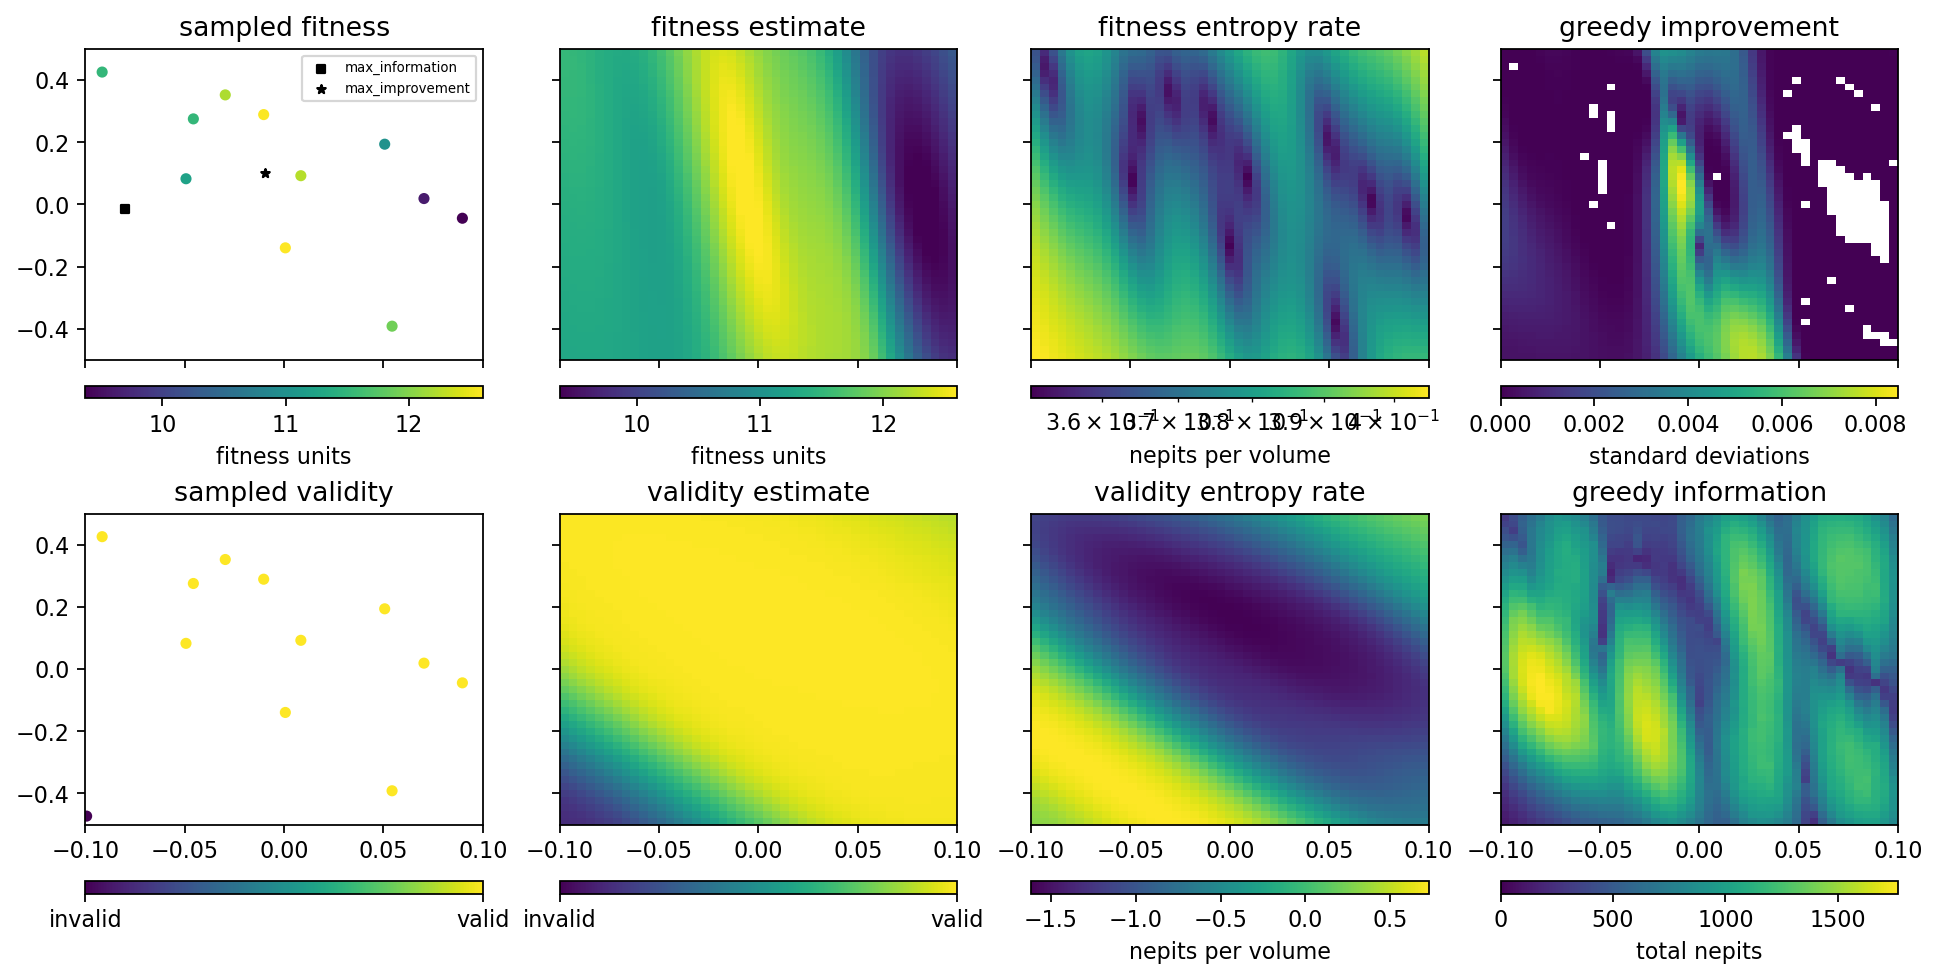

In [4]:
gpo.plot_state(gridded=True)

We can also plot the cumulative maximum fitness over time:

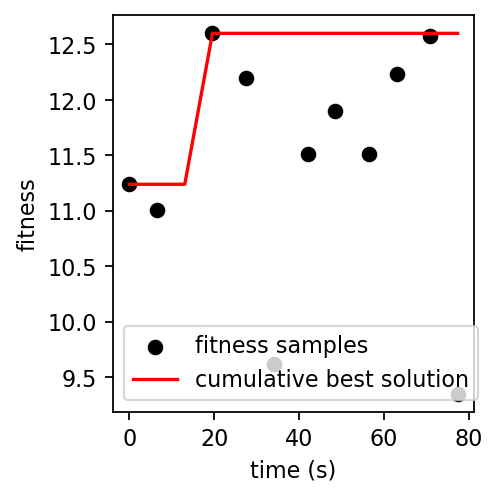

In [5]:
gpo.plot_fitness()